## Set the envirionment

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Look at the data

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,190.6731,193.2165,190.1831,192.9165,509604,ISRG
1,2013-02-11,191.9256,192.6465,189.4665,190.5065,770940,ISRG
2,2013-02-12,190.8815,191.2378,189.5098,190.4618,423156,ISRG
3,2013-02-13,190.2165,192.4165,190.1231,191.2331,337554,ISRG
4,2013-02-14,189.7398,191.1965,189.0231,190.4198,582456,ISRG
...,...,...,...,...,...,...,...
1254,2018-02-01,432.6100,433.1300,423.3600,425.9200,706539,ISRG
1255,2018-02-02,423.0100,426.2000,416.2701,416.9600,939639,ISRG
1256,2018-02-05,415.6700,417.0000,399.0100,399.0100,1255266,ISRG
1257,2018-02-06,390.6800,412.5700,385.5110,408.3300,1571945,ISRG


<Figure size 1152x576 with 0 Axes>

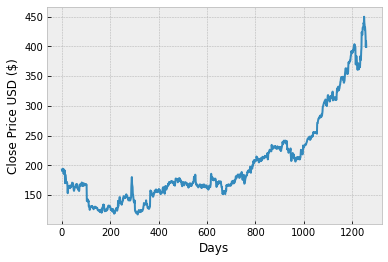

In [4]:
plt.figure(figsize=(16,8))
plt.show('Company Name')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['close'])
plt.show()

## Make learning data

In [5]:
df = df[['close']]
df.head(6)

,close
0,192.9165
1,190.5065
2,190.4618
3,191.2331
4,190.4198
5,189.7365


In [6]:
future_days = 25
df['Prediction'] = df[['close']].shift(-future_days)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,close,Prediction
0,192.9165,161.8398
1,190.5065,160.8932
2,190.4618,165.2898
3,191.2331,162.2632
4,190.4198,163.1298
...,...,...
1254,425.9200,NaN
1255,416.9600,NaN
1256,399.0100,NaN
1257,408.3300,NaN


In [7]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[192.9165],
       [190.5065],
       [190.4618],
       ...,
       [368.87  ],
       [364.94  ],
       [375.25  ]])

In [8]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[161.8398 160.8932 165.2898 ... 399.01   408.33   399.53  ]


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## learning

In [10]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [11]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [12]:
tree_prediction = tree.predict(x_future)
lr_prediction = lr.predict(x_future)

## Plot the result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


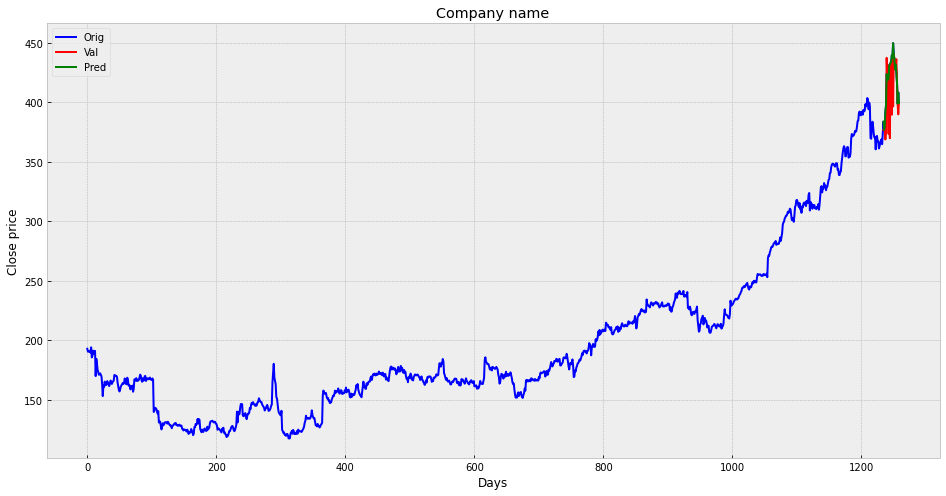

In [13]:
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Company name')
plt.xlabel('Days')
plt.ylabel('Close price')
plt.plot(df['close'], color='b')
plt.plot(valid[['Prediction']], color='r')
plt.plot(valid[['close']], color='g')
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()
